<a href="https://colab.research.google.com/github/suibhne-ofoighil/cmplxsys530-labs/blob/main/CSCS_530_Cellular_Automata_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from numpy import linalg as la
import math


### Set up cellular automata rules

We'll set up a few different rules to choose from

In [ ]:
# Rule 50

neighrule = {
        (0,0,0):0,
        (0,0,1):1,
        (0,1,0):0,
        (0,1,1):0,
        (1,0,0):1,
        (1,0,1):1,
        (1,1,0):0,
        (1,1,1):0
        }


# Rule 13
'''
neighrule = {
        (0,0,0):1,
        (0,0,1):0,
        (0,1,0):1,
        (0,1,1):1,
        (1,0,0):0,
        (1,0,1):0,
        (1,1,0):0,
        (1,1,1):0
        }
'''

# Rule 30
'''
neighrule = {
        (0,0,0):0,
        (0,0,1):1,
        (0,1,0):1,
        (0,1,1):1,
        (1,0,0):1,
        (1,0,1):0,
        (1,1,0):0,
        (1,1,1):0
        }
'''

# Rule 184 (Majority rule not counting self, with ties awarded to 1)
'''
neighrule = {
        (0,0,0):0,
        (0,0,1):0,
        (0,1,0):0,
        (0,1,1):1,
        (1,0,0):1,
        (1,0,1):1,
        (1,1,0):1,
        (1,1,1):1
        }
'''

'\nneighrule = {\n        (0,0,0):0,\n        (0,0,1):0,\n        (0,1,0):0,\n        (0,1,1):1,\n        (1,0,0):1,\n        (1,0,1):1,\n        (1,1,0):1,\n        (1,1,1):1\n        }\n'

### Set up parameters to run the cellular automata

In [ ]:
initialcond = [0,0,0,1,0,1,0,1,1,1] # for testing
L = 5  #9 #10   # Grid size (start with something small)

### Useful functions for running the model

We'll start with two functions to convert between decimal integers and binary model configurations

In [ ]:
# Takes a configuration and returns the corresponding integer
def config2int(config):
    return int(''.join(map(str, config)),2) #maps the config->strings, joins them, and then converts to int from binary

# Takes an integer and converts it to a configuration (list of cell states)
def int2config(x):
    return [1 if x & 2**i > 0 else 0 for i in range(L - 1, -1, -1)]

Next, a function to run the model--take the current configuration and map to next timestep

In [ ]:
def update(config):
    nextconfig = [0]*L
    for x in range(L):
        nextconfig[x] = neighrule[(config[(x - 1) % L],config[x],config[(x + 1) % L])]
    return nextconfig

### Run the model 

Run the model from our set initial conditions and plot the results

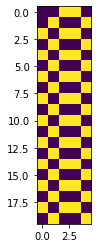

In [ ]:
# Run the model for a few steps and plot
steps = 20
output = np.zeros([steps,L])
output[0,:] = int2config(6)
for i in range(1,steps):
    output[i,:] = update(output[i-1,:])
plt.cla()
plt.imshow(output)

### Map out phase space!

We'll run the cellular automata model for every possible starting  configuration and add an edge linking each initial condition to where it goes next. Note there are $2^L$ total possible initial conditions.

In [ ]:
g = nx.DiGraph() # Make an empty graph that will be the phase space

for x in range(2**L):
    g.add_edge(x, config2int(update(int2config(x))))

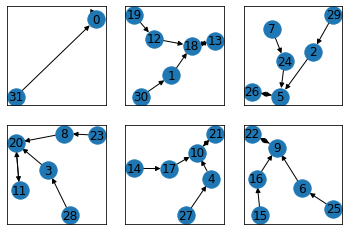

In [ ]:
# Plot each connected component of the phase space
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
w = math.ceil(math.sqrt(n))
h = math.ceil(n / w)
for i in range(n):
    plt.subplot(h, w, i + 1)
    nx.draw_networkx(nx.subgraph(g, ccs[i]), with_labels = True)

# Suplots are sometimes too packed, so also useful to just draw a few individually
#nx.draw_networkx(nx.subgraph(g, ccs[1]), with_labels = True)

### Analyzing the phase space

##### Highlight an attracting sub-component

We can highlight those nodes that form an attracting subcomponent within the network (i.e. the set of nodes for which once we have entered that set we will not exit the set---potentially this is the whole subcomponent!).

{3: Text(-0.1867257971984313, 0.2703729886255774, '3'),
 8: Text(0.1813656776619109, -0.5437903189725425, '8'),
 11: Text(1.0, 0.2489527775192935, '11'),
 20: Text(0.3983076257314257, 0.10852944848520102, '20'),
 23: Text(-0.7415117705830025, -0.8500737668538864, '23'),
 28: Text(-0.6514357356119039, 0.7660088711963571, '28')}

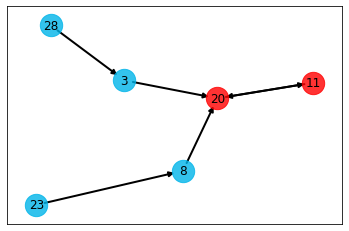

In [ ]:
subg = nx.subgraph(g, ccs[3])
attr = set().union(*nx.attracting_components(subg))

pos=nx.spring_layout(subg) # positions for all nodes
nx.draw_networkx_nodes(subg,pos, nodelist = (set(subg.nodes()) - attr), node_color='#00b4e9', node_size=500, alpha=0.8)
nx.draw_networkx_nodes(subg, pos, nodelist = attr, node_color='r', node_size=500, alpha=0.8)
nx.draw_networkx_edges(subg,pos,width=2.0)
nx.draw_networkx_labels(subg,pos)

##### Check whether there are any cycles (oscillations) in this component

In [ ]:
# Check if cycles
list(nx.simple_cycles(nx.subgraph(g,ccs[1])))

[[18, 13]]

##### Highlight network centrality

In this example, we've used degree centrality

{3: Text(-0.1867257971984313, 0.2703729886255774, '3'),
 8: Text(0.1813656776619109, -0.5437903189725425, '8'),
 11: Text(1.0, 0.2489527775192935, '11'),
 20: Text(0.3983076257314257, 0.10852944848520102, '20'),
 23: Text(-0.7415117705830025, -0.8500737668538864, '23'),
 28: Text(-0.6514357356119039, 0.7660088711963571, '28')}

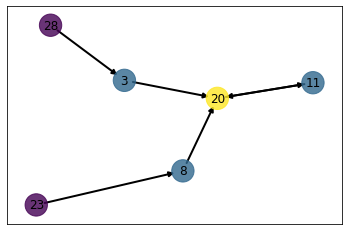

In [ ]:
nx.draw_networkx_nodes(subg, pos, node_color=list(nx.degree_centrality(subg).values()), node_size=500, alpha=0.8)
nx.draw_networkx_edges(subg,pos,width=2.0)
nx.draw_networkx_labels(subg,pos)
